 # **Ejercicio 3**: Predict New Medicines with BELKA
 ## **Modelos de Clasificación**. 
Considere el conjunto de datos `NeurIPS 2024- Predict New Medicines with BELKA`. Implemente la versión de clasificación para cada uno de los modelos estudiados en clases, esto es Regresión Logística y KNN. Construir una tabla de error que contenga las métricas usuales de clasificación: precission, recall, f1-score, AUC. Además, agregue matrices de confusión (ver confusion_matrix) y curvas ROC (ver plot_roc). Puede utilizar la librería GridSearchCV y Pipeline para evaluar cada modelo. Verifique que la validación cruzada seleccionada es la adecuada, y justifíquelo. Utilice la métrica AUC, para seleccionar el mejor modelo de clasificación (maximizar AUC). Los resultados deben estar registrados en una tabla de error (ver Tabla 1) que resuma cada score obtenido por modelo implementado.

**Cuadro 1: Modelo de clasificación para detección de fraude**

| **Modelo**            | **precision** | **recall** | **f1-score** | **AUC** |
|-----------------------|---------------|------------|--------------|---------|
| K-NN                  | ...        | ...          | ...           | ...       |
| Logistic Regression   | ...           | ...          | ...            | ...       |





## **Librerías y módulos necesarios**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## **Bases de datos**

In [3]:
proteina1 = pd.read_csv('C:/Users/kamac/OneDrive/Desktop/MachineLearningUN/proteina1.csv')
proteina2 = pd.read_csv('C:/Users/kamac/OneDrive/Desktop/MachineLearningUN/proteina2.csv')
proteina3 = pd.read_csv('C:/Users/kamac/OneDrive/Desktop/MachineLearningUN/proteina3.csv')

In [4]:
proteina1

,binds,buildingblock1_smiles_O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@@H](Cc1cccnc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@H](Cc1ccc(F)c(F)c1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)nc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1c2c(cc3c1CCC3)CCC2,buildingblock3_smiles_Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1,buildingblock3_smiles_Nc1cc(Cl)ccc1F,buildingblock3_smiles_Nc1cc(F)c(F)cc1[N+](=O)[O-],buildingblock3_smiles_Nc1ccc2c(c1)CNCC2,buildingblock3_smiles_Nc1cccc2ocnc12,buildingblock3_smiles_Nc1cncc(F)c1,buildingblock3_smiles_Nc1n[nH]c2ccc([N+](=O)[O-])cc12,buildingblock3_smiles_Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],buildingblock3_smiles_Nc1ncco1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
proteina2

,binds,buildingblock1_smiles_CC(C)(C)OC(=O)CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(C)(C)OCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(C)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(OC(C)(C)C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_Cc1ccccc1[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_N#Cc1ccc(C[C@@H](NC(=O)OCC2c3ccccc3-c3ccccc32)C(=O)O)cc1,buildingblock1_smiles_O=C(NC(CC1CCCCC1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC(CCc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1cc(Cl)c(O)c(Cl)c1,buildingblock3_smiles_Nc1cc(N2CCNCC2)ccc1[N+](=O)[O-],buildingblock3_smiles_Nc1ccc2[nH]ncc2c1,buildingblock3_smiles_Nc1ccc2c(c1)CCC2=O,buildingblock3_smiles_Nc1ccc2c(c1)CNC2=O,buildingblock3_smiles_Nc1ccc2c(c1)COC2=O,buildingblock3_smiles_Nc1cccnc1F,buildingblock3_smiles_Nc1nc2ccccc2s1,buildingblock3_smiles_Nc1nc2nc[nH]c2c(=O)[nH]1,buildingblock3_smiles_Nc1nccs1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Modelos proteína 1 (SEH)**


In [112]:
proteina1.head()

,binds,buildingblock1_smiles_O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@@H](Cc1cccnc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@H](Cc1ccc(F)c(F)c1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)nc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1c2c(cc3c1CCC3)CCC2,buildingblock3_smiles_Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1,buildingblock3_smiles_Nc1cc(Cl)ccc1F,buildingblock3_smiles_Nc1cc(F)c(F)cc1[N+](=O)[O-],buildingblock3_smiles_Nc1ccc2c(c1)CNCC2,buildingblock3_smiles_Nc1cccc2ocnc12,buildingblock3_smiles_Nc1cncc(F)c1,buildingblock3_smiles_Nc1n[nH]c2ccc([N+](=O)[O-])cc12,buildingblock3_smiles_Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],buildingblock3_smiles_Nc1ncco1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
proteina1.shape

(100000, 100)

In [114]:
X1 = proteina1.drop(columns = ['binds'])
y1 = proteina1['binds']

In [123]:
# Dividir el conjunto de entrenamiento en dos partes: entrenamiento y test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify = y1, random_state = 11)

In [116]:
len(y_train1)

75000

In [117]:
len(y_test1)

25000

### **Modelo KNN**

In [124]:
pipeline_knn1 = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])

param_grid_knn1 = [{ 'clasificador__n_neighbors': range(2 , 16),# Número de vecinos del modelo
                   'clasificador__weights': ['uniform', 'distance']}]

kf1 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_met1 = GridSearchCV(pipeline_knn1, param_grid_knn1, cv = kf1, scoring = 'roc_auc')

In [125]:
grid_met1.fit(X_train1, y_train1)
print("Mejor parámetro:", grid_met1.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_met1.best_score_)

Mejor parámetro: {'clasificador__n_neighbors': 15, 'clasificador__weights': 'distance'}
Mejor AUC en conjunto de entrenamiento:  0.8242267120298731


### **Modelo Regresión Logística**

In [120]:
pipeline_rl1 = Pipeline([ ('scaler', StandardScaler()), ('clasificador', LogisticRegression(max_iter = 1000))])

param_grid_lr1 = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}

kf1 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_rl1 = GridSearchCV(pipeline_rl1, param_grid_lr1, cv = kf1, scoring = 'roc_auc')

In [127]:
grid_rl1.fit(X_train1, y_train1)
print("Mejor parámetro:", grid_rl1.best_params_)
print("Mejor AUC en conjunto de entrenamiento:", grid_rl1.best_score_)

Mejor parámetro: {'clasificador__C': 0.01}
Mejor AUC en conjunto de entrenamiento: 0.9492389162354249


### **Cuadro 1**

In [133]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
KYP1 = grid_met1.predict(X_test1)
LYP1 = grid_rl1.predict(X_test1)

# Evalua las predicciones en cada métrica con las etiquetas del test
tabla1 = {
    'Modelo': ['K-nn', 'Regresión logística'],
    'Precision': [
        precision_score(y_test1, KYP1), # K-NN
        precision_score(y_test1, LYP1) # Regresión logística
    ],
    'Recall': [
        recall_score(y_test1, KYP1),
        recall_score(y_test1, LYP1)
    ],
    'F1 Score': [
        f1_score(y_test1, KYP1),
        f1_score(y_test1, LYP1)
    ],
    # En ROC AUC, No se tienen en cuenta las etiquetas sino las probabilidades
    'ROC AUC': [
        roc_auc_score(y_test1, KYP1),
        roc_auc_score(y_test1, LYP1)
    ]
}

cuadro1 = pd.DataFrame(tabla1)
cuadro1

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,K-nn,0.846154,0.059783,0.111675,0.529851
1,Regresión logística,0.594059,0.326087,0.421053,0.662217


### **Matrices de confusión**

In [129]:
colors = ['#FF69B4', '#FF6EB4', '#EE6AA7', '#CD6090', '#8B3A62']
cmap = LinearSegmentedColormap.from_list("custom_pink", colors)

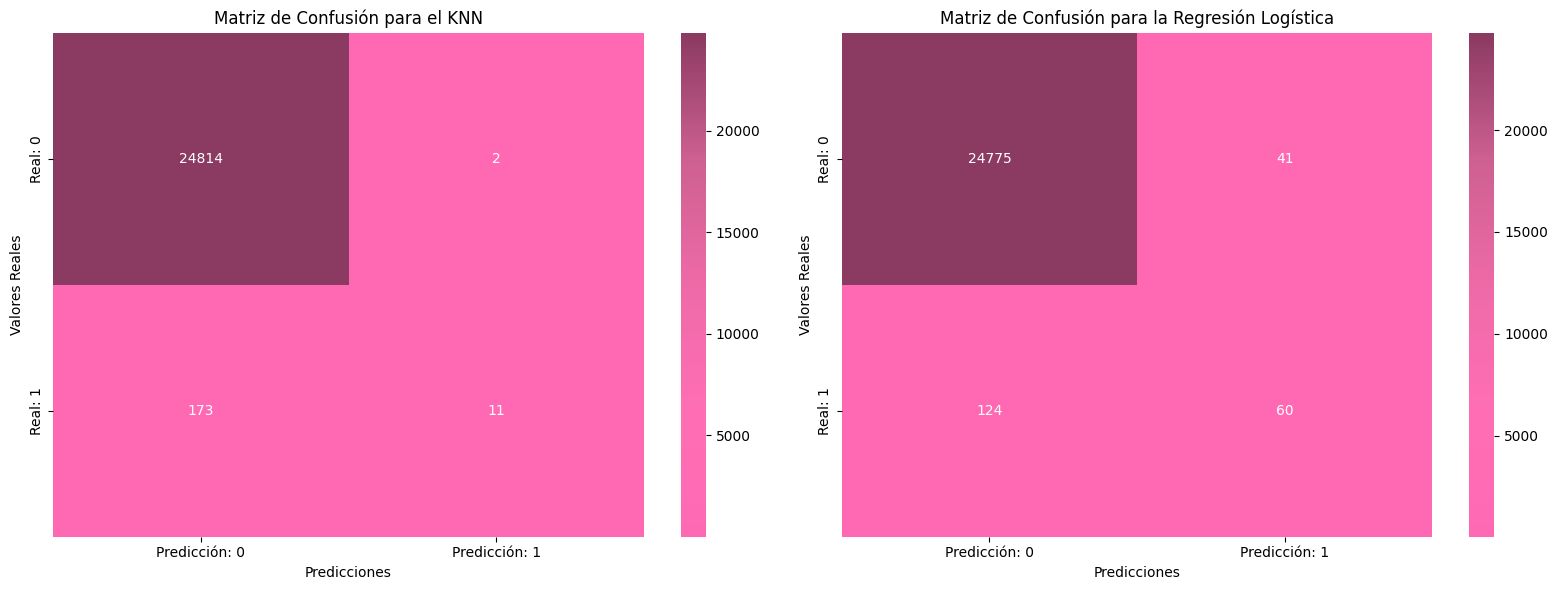

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de la Matriz de Confusión para KNN

y_pred_knn1 = KYP1
cm_knn1 = confusion_matrix(y_test1, y_pred_knn1)
sns.heatmap(cm_knn1, annot = True, fmt ='d', cmap = cmap, xticklabels = ['Predicción: 0', 'Predicción: 1'],
            yticklabels = ['Real: 0', 'Real: 1'], ax = axes[0])
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')
axes[0].set_title('Matriz de Confusión para el KNN')

# Gráfico de la Matriz de Confusión para la Regresión Logística

y_pred_lr1 = LYP1
cm_logistic = confusion_matrix(y_test1, y_pred_lr1)  # Crear la matriz de confusión
sns.heatmap(cm_logistic, annot = True,  fmt ='d', cmap = cmap, xticklabels=['Predicción: 0', 'Predicción: 1'],
            yticklabels=['Real: 0', 'Real: 1'], ax = axes[1])
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')
axes[1].set_title('Matriz de Confusión para la Regresión Logística')


plt.tight_layout()
plt.show()


### **Curvas ROC**

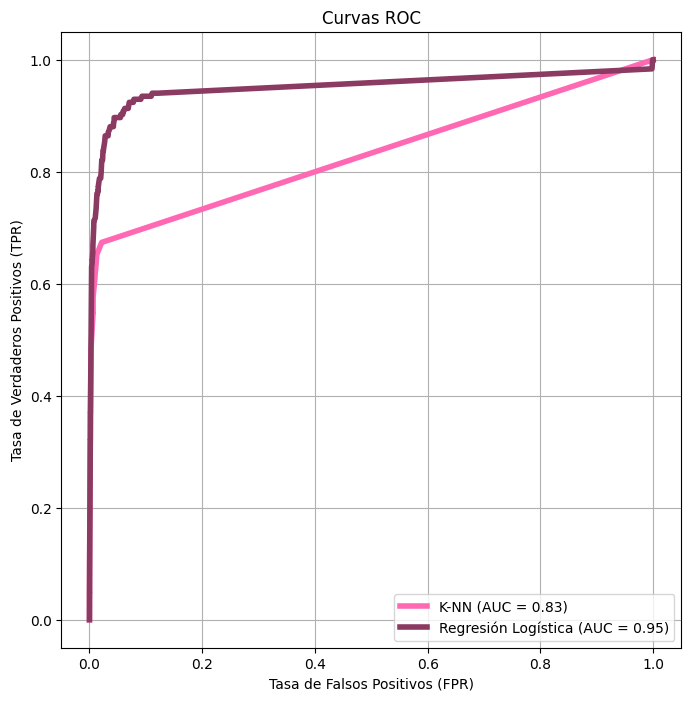

In [132]:
y_pred_prob_knn = grid_met1.predict_proba(X_test1)[:, 1]  # Probabilidades clase positiva para K-NN
y_pred_prob_lr = grid_rl1.predict_proba(X_test1)[:, 1]  # Probabilidades clase positiva para Regresión Logística

# Valores para la curva ROC para K-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test1, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test1, y_pred_prob_knn)

# Valores para la curva ROC para Regresión Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test1, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test1, y_pred_prob_lr)

# Graficar ambas curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color = '#FF69B4', label = f'K-NN (AUC = {roc_auc_knn:.2f})', lw = 4)
plt.plot(fpr_lr, tpr_lr, color = '#8B3A62', label = f'Regresión Logística (AUC = {roc_auc_lr:.2f})', lw = 4)


plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



## **Modelos proteína 2 (BRD4)**


In [134]:
proteina2.head()

,binds,buildingblock1_smiles_O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@@H](Cc1cccnc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@H](Cc1ccc(F)c(F)c1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)nc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1c2c(cc3c1CCC3)CCC2,buildingblock3_smiles_Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1,buildingblock3_smiles_Nc1cc(Cl)ccc1F,buildingblock3_smiles_Nc1cc(F)c(F)cc1[N+](=O)[O-],buildingblock3_smiles_Nc1ccc2c(c1)CNCC2,buildingblock3_smiles_Nc1cccc2ocnc12,buildingblock3_smiles_Nc1cncc(F)c1,buildingblock3_smiles_Nc1n[nH]c2ccc([N+](=O)[O-])cc12,buildingblock3_smiles_Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],buildingblock3_smiles_Nc1ncco1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
proteina2.shape

(100000, 100)

In [137]:
X2 = proteina2.drop(columns = ['binds'])
y2 = proteina2['binds']

In [138]:
# Dividir el conjunto de entrenamiento en dos partes: entrenamiento y test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify = y2, random_state = 11)

In [139]:
len(y_train2)

75000

In [140]:
len(y_test2)

25000

### **Modelo KNN**

In [141]:
pipeline_knn2 = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])

param_grid_knn2 = [{ 'clasificador__n_neighbors': range(2 , 16),# Número de vecinos del modelo
                   'clasificador__weights': ['uniform', 'distance']}]

kf2 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_met2 = GridSearchCV(pipeline_knn2, param_grid_knn2, cv = kf2, scoring = 'roc_auc')

In [142]:
grid_met2.fit(X_train2, y_train2)
print("Mejor parámetro:", grid_met2.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_met2.best_score_)

Mejor parámetro: {'clasificador__n_neighbors': 15, 'clasificador__weights': 'distance'}
Mejor AUC en conjunto de entrenamiento:  0.8242267120298731



### **Modelo Regresión Logística**

In [143]:
pipeline_rl2 = Pipeline([ ('scaler', StandardScaler()), ('clasificador', LogisticRegression(max_iter = 1000))])

param_grid_lr2 = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}

kf2 = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_rl2 = GridSearchCV(pipeline_rl2, param_grid_lr2, cv = kf2, scoring = 'roc_auc')

In [144]:
grid_rl2.fit(X_train2, y_train2)
print("Mejor parámetro:", grid_rl2.best_params_)
print("Mejor AUC en conjunto de entrenamiento:", grid_rl2.best_score_)

Mejor parámetro: {'clasificador__C': 0.01}
Mejor AUC en conjunto de entrenamiento: 0.9492389162354249


### **Cuadro 1**

In [85]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
KYP = grid_met.predict(X_test)
LYP = grid_rl.predict(X_test)

# Evalua las predicciones en cada métrica con las etiquetas del test
tabla1 = {
    'Modelo': ['K-nn', 'Regresión logística'],
    'Precision': [
        precision_score(y_test, KYP), # K-NN
        precision_score(y_test, LYP) # Regresión logística
    ],
    'Recall': [
        recall_score(y_test, KYP),
        recall_score(y_test, LYP)
    ],
    'F1 Score': [
        f1_score(y_test, KYP),
        f1_score(y_test, LYP)
    ],
    # En ROC AUC, No se tienen en cuenta las etiquetas sino las probabilidades
    'ROC AUC': [
        roc_auc_score(y_test, KYP),
        roc_auc_score(y_test, LYP)
    ]
}

cuadro1 = pd.DataFrame(tabla1)
cuadro1

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,K-nn,0.846154,0.059783,0.111675,0.529851
1,Regresión logística,0.594059,0.326087,0.421053,0.662217


### **Matrices de confusión**

In [86]:
colors = ['#FF69B4', '#FF6EB4', '#EE6AA7', '#CD6090', '#8B3A62']
cmap = LinearSegmentedColormap.from_list("custom_pink", colors)

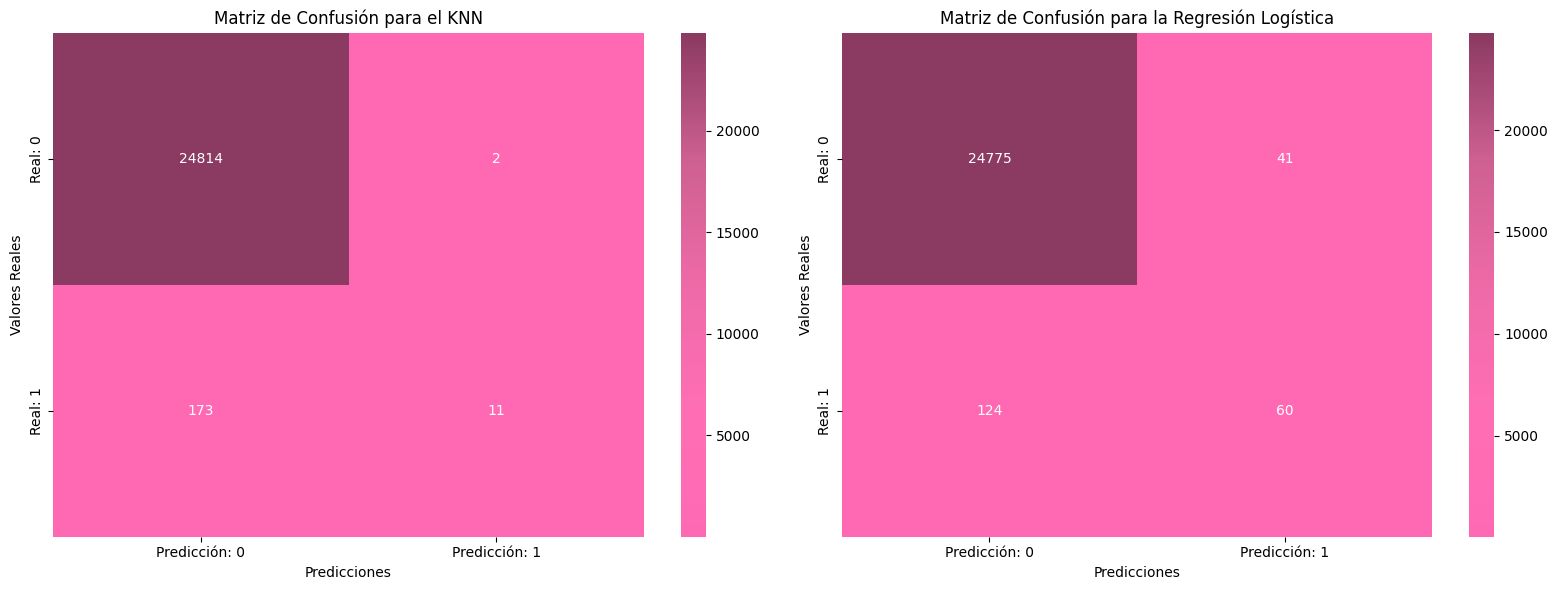

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de la Matriz de Confusión para KNN

y_pred_knn = KYP
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot = True, fmt ='d', cmap = cmap, xticklabels = ['Predicción: 0', 'Predicción: 1'],
            yticklabels = ['Real: 0', 'Real: 1'], ax = axes[0])
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')
axes[0].set_title('Matriz de Confusión para el KNN')

# Gráfico de la Matriz de Confusión para la Regresión Logística

y_pred_lr = LYP
cm_logistic = confusion_matrix(y_test, y_pred_lr)  # Crear la matriz de confusión
sns.heatmap(cm_logistic, annot = True,  fmt ='d', cmap = cmap, xticklabels=['Predicción: 0', 'Predicción: 1'],
            yticklabels=['Real: 0', 'Real: 1'], ax = axes[1])
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')
axes[1].set_title('Matriz de Confusión para la Regresión Logística')


plt.tight_layout()
plt.show()


### **Curvas ROC**

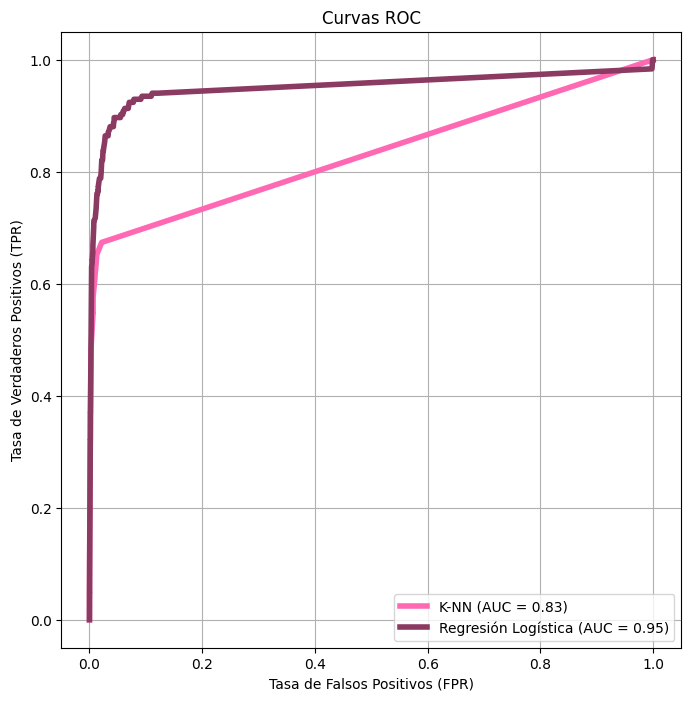

In [88]:
y_pred_prob_knn = grid_met.predict_proba(X_test)[:, 1]  # Probabilidades clase positiva para K-NN
y_pred_prob_lr = grid_rl.predict_proba(X_test)[:, 1]  # Probabilidades clase positiva para Regresión Logística

# Valores para la curva ROC para K-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

# Valores para la curva ROC para Regresión Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Graficar ambas curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color = '#FF69B4', label = f'K-NN (AUC = {roc_auc_knn:.2f})', lw = 4)
plt.plot(fpr_lr, tpr_lr, color = '#8B3A62', label = f'Regresión Logística (AUC = {roc_auc_lr:.2f})', lw = 4)


plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## **Modelos proteína 3 (HSA)**


In [89]:
proteina3.head()

,binds,buildingblock1_smiles_O=C(NC(Cc1ccccc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@@H](Cc1cccnc1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(N[C@H](Cc1ccc(F)c(F)c1)C(=O)O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)cc1O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1ccc(C(=O)O)nc1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(Nc1cnccc1C(=O)O)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1c2c(cc3c1CCC3)CCC2,buildingblock3_smiles_Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1,buildingblock3_smiles_Nc1cc(Cl)ccc1F,buildingblock3_smiles_Nc1cc(F)c(F)cc1[N+](=O)[O-],buildingblock3_smiles_Nc1ccc2c(c1)CNCC2,buildingblock3_smiles_Nc1cccc2ocnc12,buildingblock3_smiles_Nc1cncc(F)c1,buildingblock3_smiles_Nc1n[nH]c2ccc([N+](=O)[O-])cc12,buildingblock3_smiles_Nc1nc(NCc2ccc(F)cc2)ccc1[N+](=O)[O-],buildingblock3_smiles_Nc1ncco1
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
proteina3.shape

(100000, 100)

In [91]:
X = proteina3.drop(columns = ['binds'])
y = proteina3['binds']

In [92]:
# Dividir el conjunto de entrenamiento en dos partes: entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 11)

In [93]:
len(y_train)

75000

In [94]:
len(y_test)

25000

### **Modelo KNN**

In [95]:
pipeline_knn = Pipeline([('scaler', StandardScaler()), ('clasificador', KNeighborsClassifier())])

param_grid_knn = [{ 'clasificador__n_neighbors': range(2 , 16),# Número de vecinos del modelo
                   'clasificador__weights': ['uniform', 'distance']}]

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_met = GridSearchCV(pipeline_knn, param_grid_knn, cv = kf, scoring = 'roc_auc')

In [96]:
grid_met.fit(X_train, y_train)
print("Mejor parámetro:", grid_met.best_params_)
print("Mejor AUC en conjunto de entrenamiento: ",grid_met.best_score_)

Mejor parámetro: {'clasificador__n_neighbors': 15, 'clasificador__weights': 'distance'}
Mejor AUC en conjunto de entrenamiento:  0.8242267120298731


### **Modelo Regresión Logística**

In [97]:
pipeline_rl = Pipeline([ ('scaler', StandardScaler()), ('clasificador', LogisticRegression(max_iter = 1000))])

param_grid_lr = {'clasificador__C': [0.01, 0.1, 1, 10, 100, 1000]}

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 11)

grid_rl = GridSearchCV(pipeline_rl, param_grid_lr, cv = kf, scoring = 'roc_auc')

In [98]:
grid_rl.fit(X_train, y_train)
print("Mejor parámetro:", grid_rl.best_params_)
print("Mejor AUC en conjunto de entrenamiento:", grid_rl.best_score_)

Mejor parámetro: {'clasificador__C': 0.01}
Mejor AUC en conjunto de entrenamiento: 0.9492389162354249


### **Cuadro 1**

In [99]:
# Se hacen las predicciones para poder comparar con las diferentes métricas
KYP = grid_met.predict(X_test)
LYP = grid_rl.predict(X_test)

# Evalua las predicciones en cada métrica con las etiquetas del test
tabla1 = {
    'Modelo': ['K-nn', 'Regresión logística'],
    'Precision': [
        precision_score(y_test, KYP), # K-NN
        precision_score(y_test, LYP) # Regresión logística
    ],
    'Recall': [
        recall_score(y_test, KYP),
        recall_score(y_test, LYP)
    ],
    'F1 Score': [
        f1_score(y_test, KYP),
        f1_score(y_test, LYP)
    ],
    # En ROC AUC, No se tienen en cuenta las etiquetas sino las probabilidades
    'ROC AUC': [
        roc_auc_score(y_test, KYP),
        roc_auc_score(y_test, LYP)
    ]
}

cuadro1 = pd.DataFrame(tabla1)
cuadro1

,Modelo,Precision,Recall,F1 Score,ROC AUC
0,K-nn,0.846154,0.059783,0.111675,0.529851
1,Regresión logística,0.594059,0.326087,0.421053,0.662217


### **Matrices de confusión**

In [100]:
colors = ['#FF69B4', '#FF6EB4', '#EE6AA7', '#CD6090', '#8B3A62']
cmap = LinearSegmentedColormap.from_list("custom_pink", colors)

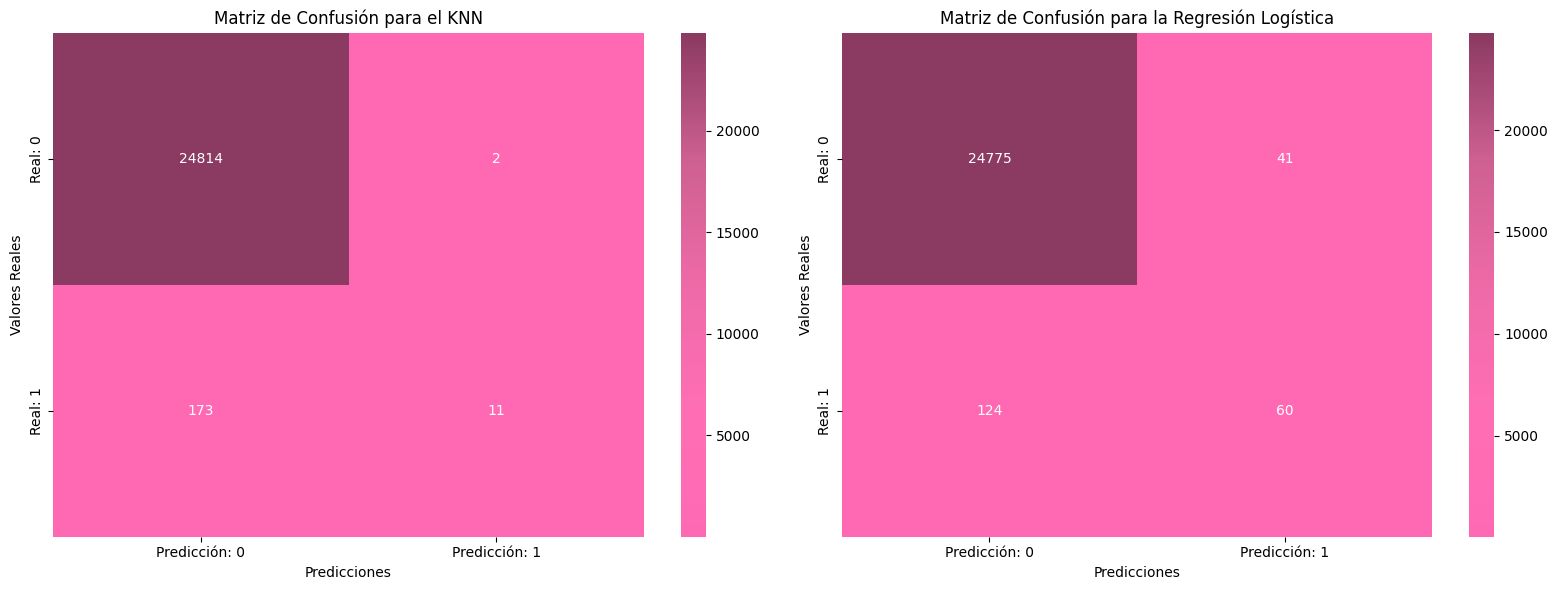

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de la Matriz de Confusión para KNN

y_pred_knn = KYP
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot = True, fmt ='d', cmap = cmap, xticklabels = ['Predicción: 0', 'Predicción: 1'],
            yticklabels = ['Real: 0', 'Real: 1'], ax = axes[0])
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Valores Reales')
axes[0].set_title('Matriz de Confusión para el KNN')

# Gráfico de la Matriz de Confusión para la Regresión Logística

y_pred_lr = LYP
cm_logistic = confusion_matrix(y_test, y_pred_lr)  # Crear la matriz de confusión
sns.heatmap(cm_logistic, annot = True,  fmt ='d', cmap = cmap, xticklabels=['Predicción: 0', 'Predicción: 1'],
            yticklabels=['Real: 0', 'Real: 1'], ax = axes[1])
axes[1].set_xlabel('Predicciones')
axes[1].set_ylabel('Valores Reales')
axes[1].set_title('Matriz de Confusión para la Regresión Logística')


plt.tight_layout()
plt.show()


### **Curvas ROC**

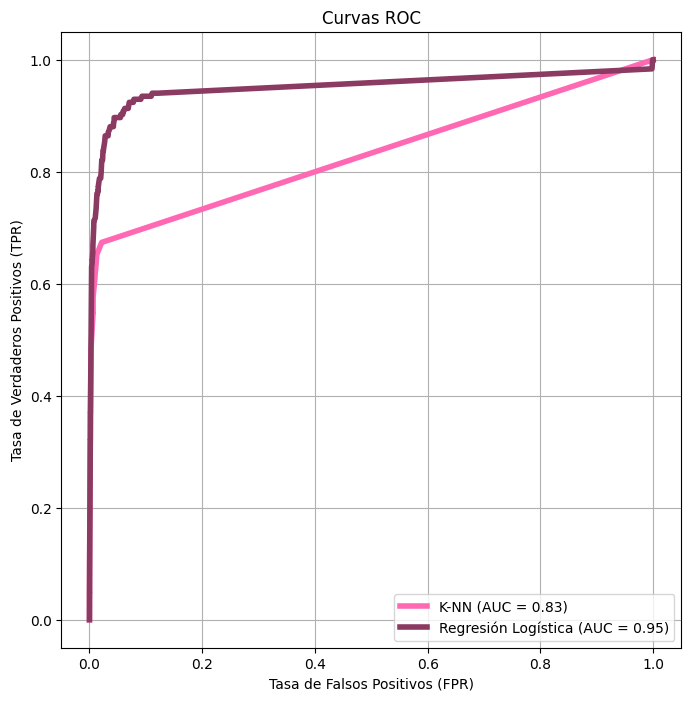

In [102]:
y_pred_prob_knn = grid_met.predict_proba(X_test)[:, 1]  # Probabilidades clase positiva para K-NN
y_pred_prob_lr = grid_rl.predict_proba(X_test)[:, 1]  # Probabilidades clase positiva para Regresión Logística

# Valores para la curva ROC para K-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

# Valores para la curva ROC para Regresión Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Graficar ambas curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color = '#FF69B4', label = f'K-NN (AUC = {roc_auc_knn:.2f})', lw = 4)
plt.plot(fpr_lr, tpr_lr, color = '#8B3A62', label = f'Regresión Logística (AUC = {roc_auc_lr:.2f})', lw = 4)


plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
